# Explore here

In [71]:
#Step 1: Loading the dataset
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
#Storing the raw data in the ./data/raw folder
data.to_csv("../data/raw/data.csv", index = False)

In [73]:
#Step 2: Performing a full EDA
#Information about data types and non-null values

data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In conclusion:
There are a total of 1338 rows and 7 columns.
The variables do not contain null values.  
The data has 4 numerical characteristics and 3 categorical characteristics.

In [74]:
#Eliminating irrelevant information
data.drop(["region", "children"], axis = 1, inplace = True)
data.head()

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520


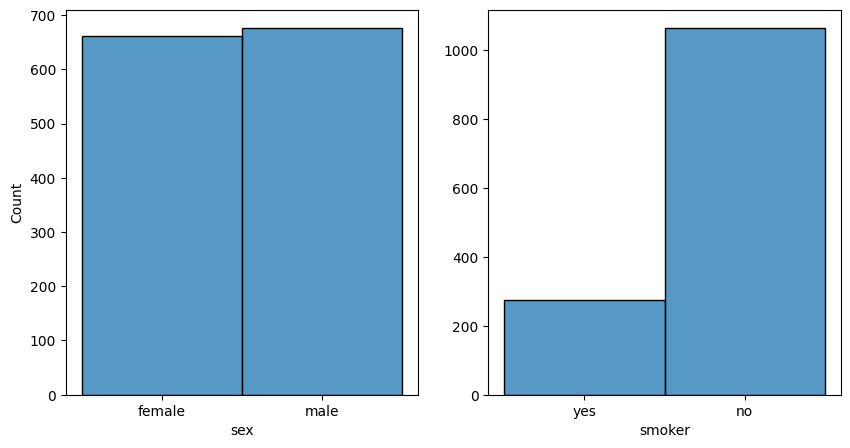

In [75]:
#Analysis of univariate (categorical) variables
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 2, figsize = (10, 5))

# Create histograms
sns.histplot(ax=axis[0], data=data, x='sex')
sns.histplot(ax=axis[1], data=data, x='smoker').set(ylabel=None)

# Show plot
plt.show()

From the histograms we can see that the sex is divided into male and female almost in the same proportions; as for smokers, they represent almost 25% of the sample.

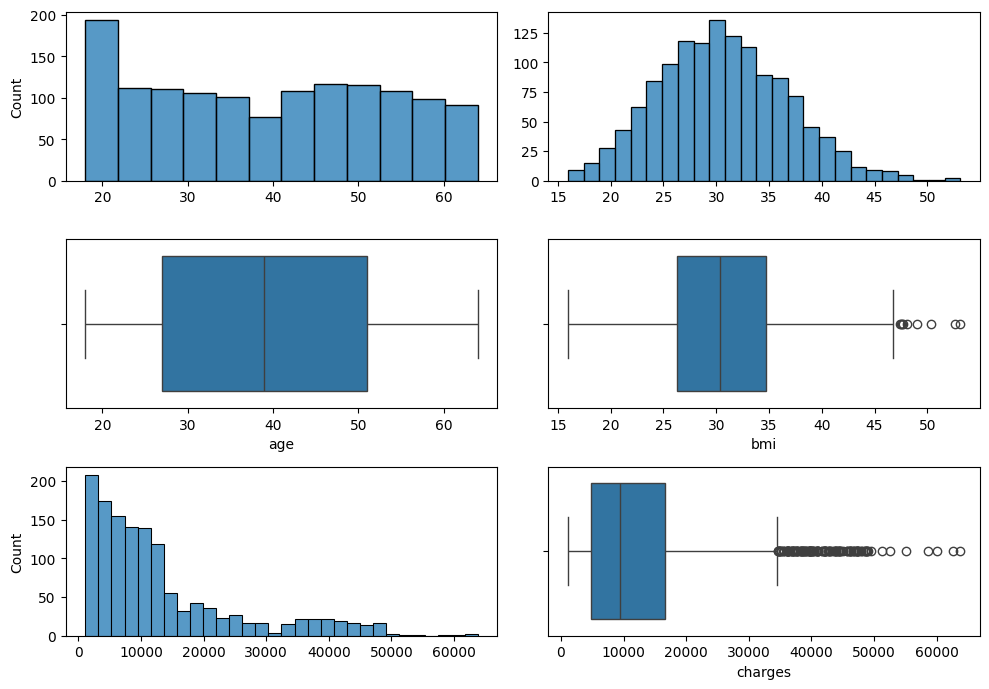

In [76]:
#Analysis on numeric variables
fig, axis = plt.subplots(3, 2, figsize = (10, 7))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "age")
sns.histplot(ax = axis[0, 1], data = data, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "bmi")
sns.histplot(ax = axis[2, 0], data = data, x = "charges").set(xlabel = None)
sns.boxplot(ax = axis[2, 1], data = data, x = "charges")


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

As we can see from the graphs above bmi has some outliers. We should set some upper and lower bounds to determine whether a data point should be modified, eliminated or kept.

In [77]:
# BMI
bmi_stats = data["bmi"].describe()
bmi_stats

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [78]:
bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]
upper_limit = bmi_stats["75%"] + 1.5 * bmi_iqr
lower_limit = bmi_stats["25%"] - 1.5 * bmi_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(bmi_iqr, 2)}")

The upper and lower limits for finding outliers are 47.29 and 13.7, with an interquartile range of 8.4


In [79]:
data[data["bmi"] > 50]

,age,sex,bmi,smoker,charges
847,23,male,50.38,no,2438.0552
1047,22,male,52.58,yes,44501.3982
1317,18,male,53.13,no,1163.4627


Based on these results, the records of the persons with bmi more than 50 should be eliminated. However, it also can be seen that these persons are all young men with obesity problems, some of them are smoking and, for sure, have other characteristics that increases the charges. So thus, these values are likely to have an impact on the target variable and it´s better to keep the outliers.

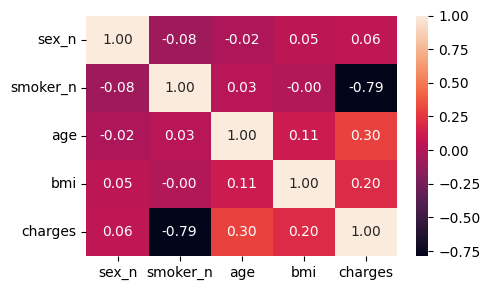

In [80]:
# Numerical-categorical analysis (complete)
# Factorizing (convert categorical values into numerical labels) values:
data["sex_n"] = pd.factorize(data["sex"])[0]
data["smoker_n"] = pd.factorize(data["smoker"])[0]

fig, axis = plt.subplots(figsize = (5, 3))

sns.heatmap(data[["sex_n", "smoker_n", "age", "bmi", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

There is a strong negative relationship between smoker_n and charges, which is logical because when the insured person smokes the insurance is more expensive. On the other hand, there is a positive relationship between age and charges that is obvious, the older the insured the high he/she is charged for insurance.

In [81]:
#Feature scaling
from sklearn.model_selection import train_test_split

num_variables = ["sex_n", "smoker_n", "age", "bmi"]

# Dividing the dataset into training and test samples
X = data.drop("charges", axis = 1)[num_variables]
y = data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,sex_n,smoker_n,age,bmi
560,0,1,46,19.95
1285,0,1,47,24.32
1142,0,1,52,24.86
969,0,1,39,34.32
486,0,1,54,21.47


In [82]:
#Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,sex_n,smoker_n,age,bmi
560,0.0,1.0,0.608696,0.107345
1285,0.0,1.0,0.630435,0.224913
1142,0.0,1.0,0.739130,0.239440
969,0.0,1.0,0.456522,0.493947
486,0.0,1.0,0.782609,0.148238


In [83]:
#Feature selection
from sklearn.feature_selection import f_classif, SelectKBest

#Selecting the 3 best features (independant variables)
selection_model = SelectKBest(f_classif, k = 3)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,smoker_n,age,bmi
0,1.0,46.0,19.95
1,1.0,47.0,24.32
2,1.0,52.0,24.86
3,1.0,39.0,34.32
4,1.0,54.0,21.47


In [84]:
X_test_sel.head()

,smoker_n,age,bmi
0,1.0,45.0,25.175
1,1.0,36.0,30.020
2,0.0,64.0,26.885
3,1.0,46.0,25.745
4,0.0,19.0,31.920


In [85]:
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)
X_train_sel.to_csv("/workspaces/Liutciia-linear-regression/data/processed/medical_insurance_cost_data_train.csv", index=False)
X_test_sel.to_csv("/workspaces/Liutciia-linear-regression/data/processed/medical_insurance_cost-data_test.csv", index=False)

In [86]:
train_data = pd.read_csv("../data/processed/medical_insurance_cost_data_train.csv")
test_data = pd.read_csv("../data/processed/medical_insurance_cost-data_test.csv")

train_data.head()

,smoker_n,age,bmi,charges
0,1.0,46.0,19.95,9193.83850
1,1.0,47.0,24.32,8534.67180
2,1.0,52.0,24.86,27117.99378
3,1.0,39.0,34.32,8596.82780
4,1.0,54.0,21.47,12475.35130


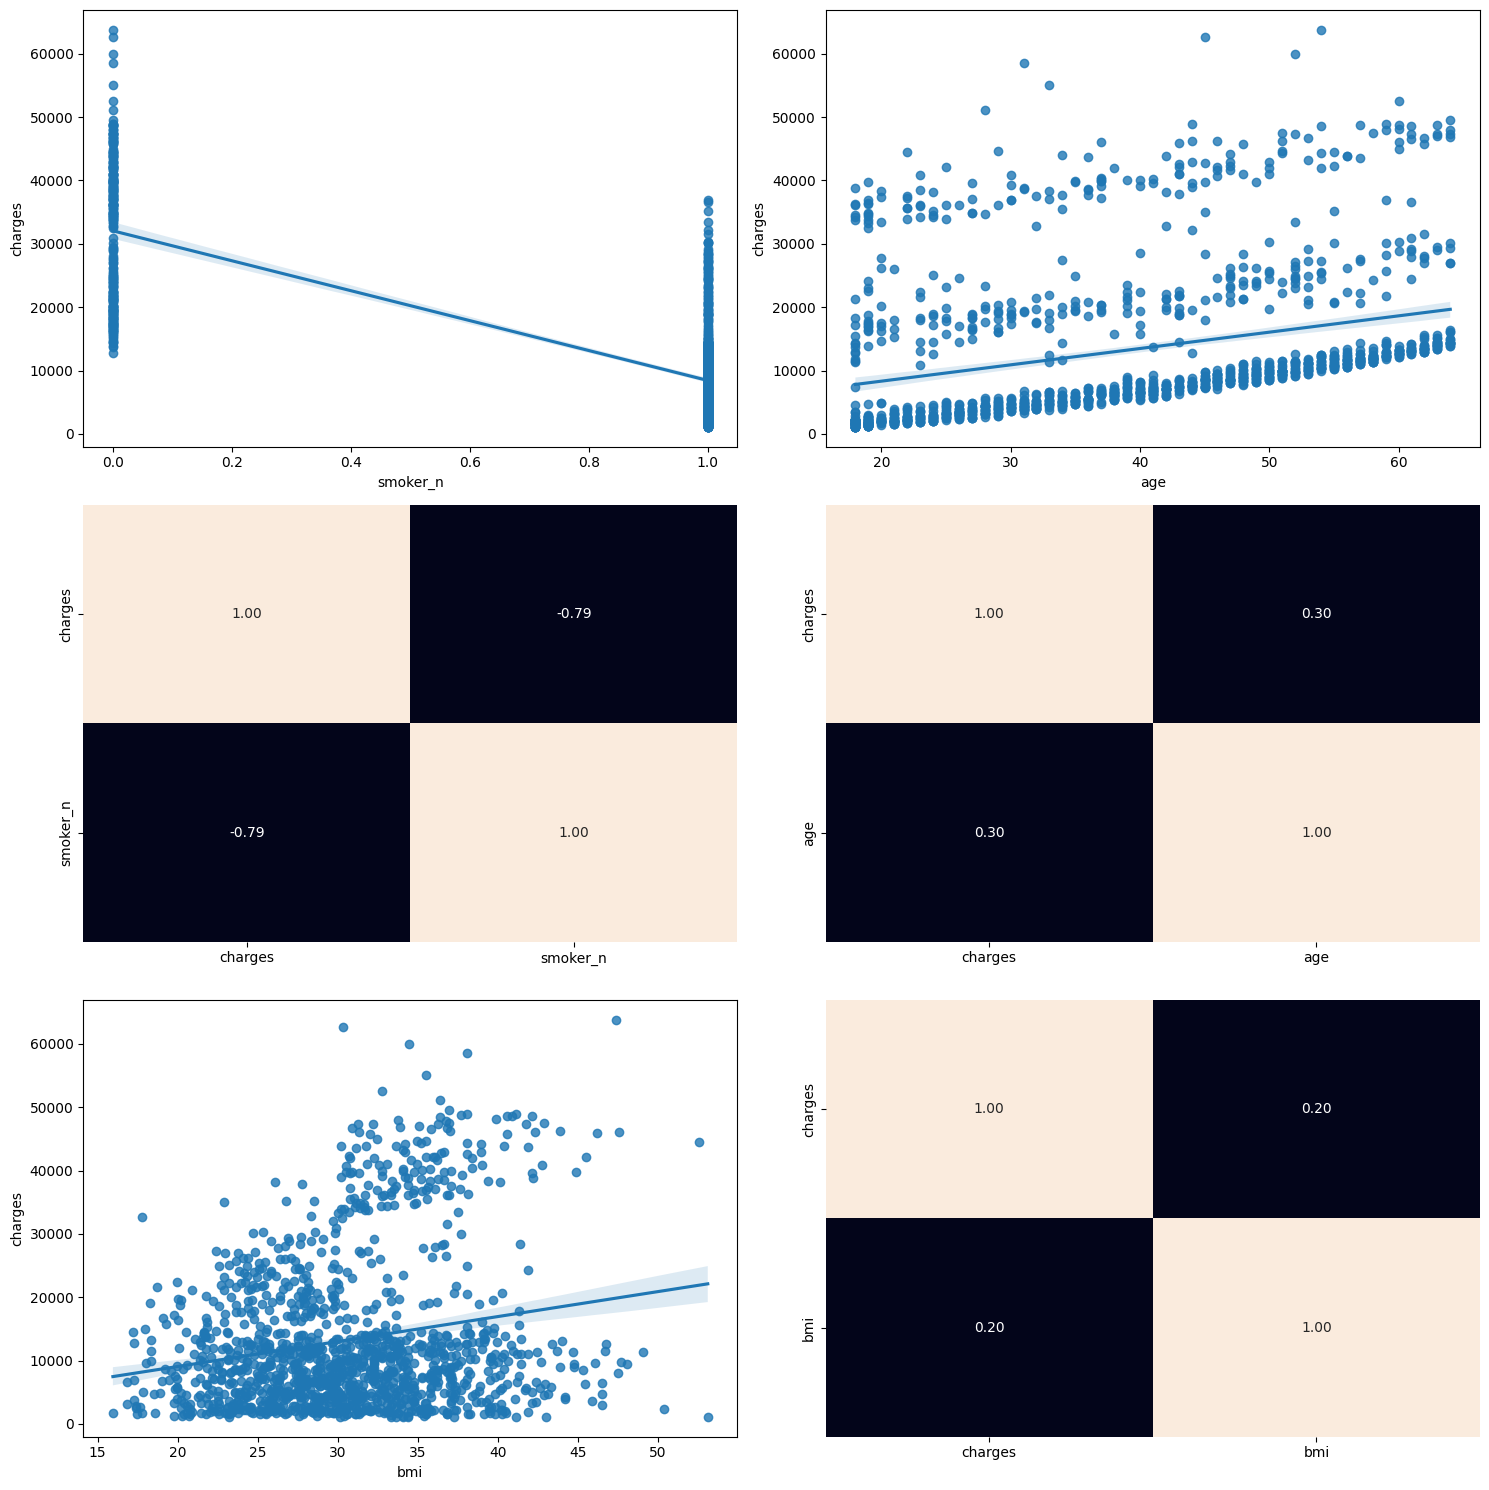

In [87]:
#Step 3: LINEAR REGRESSION (Multiple linear regression)

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(3, 2, figsize = (15, 15))
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0, 0], data = total_data, x = "smoker_n", y = "charges")
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[2, 0], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[2, 1], cbar = False)


plt.tight_layout()

plt.show()

There is a clear linear relationship between the predictor variables such as smoker, age, bmi and the target variable. Although the correlation with age and bmi variables is lower. 

In [88]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [89]:
#Initialization and training of the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [90]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2, b3): {model.coef_}")

Intercept (a): 11967.569512072132
Coefficients (b1, b2, b3): [-23675.37184666    259.41020462    326.45023215]


In [91]:
#Model prediction
y_pred = model.predict(X_test)
y_pred

array([ 8.18404147e+03,  7.43100100e+03,  3.73464371e+04,  8.62952830e+03,
        2.73166548e+04,  1.11168596e+04,  5.71018530e+02,  1.72685468e+04,
        1.20000791e+03,  1.03691549e+04,  2.77152613e+04,  8.91412866e+03,
        5.47475597e+03,  3.77256063e+04,  4.08905253e+04,  3.68718212e+04,
        1.49361936e+04,  3.61177211e+04,  9.38199609e+03,  3.18988228e+04,
        2.57961333e+03,  1.00891140e+04,  3.14507861e+03,  6.99357366e+03,
        1.04424884e+04,  1.29687423e+04,  1.53152131e+04,  5.22036025e+03,
        9.16805346e+03,  2.80079135e+03,  8.23359765e+03,  1.34678580e+04,
        5.12313156e+03,  2.58718594e+03,  4.83036995e+03,  1.29600084e+04,
        2.35809809e+03,  9.20769841e+03,  3.33341443e+04,  3.27973851e+04,
        2.55746819e+03,  4.23343695e+03,  1.45060874e+04,  1.19088226e+04,
        8.52333022e+03,  1.25747811e+04,  4.71833327e+03,  2.71019342e+03,
        3.48646232e+04,  8.86633842e+03,  1.64851840e+04,  2.54942467e+03,
        1.21901745e+04,  

In [92]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 34512843.8802279
Coefficient of determination: 0.7776932310583374


The R2 value of 0.78 shows that the model has a good fit overall, however, the high MSE value suggests that the predictions have substantial errors on average. This might be due to a few large outliers.

Step 4: Optimization of results
This type of model cannot be optimized due to the absence of hyperparameters